In [78]:
date=input("Enter date here in year, month, date format: ")
import pandas as pd
import numpy as np
data = pd.read_csv(date)
data



Enter date here in year, month, date format: 20220131


,hour,temp(F),humidity,AQI,PM1,PM2.5,PM10
0,0,33.600000,40.000000,86.600000,18.992000,29.008000,34.041000
1,1,33.266667,40.633333,74.700000,14.923000,23.357667,27.697667
2,2,31.866667,42.366667,82.166667,17.098000,26.936667,31.871333
3,3,31.933333,42.533333,77.300000,15.967667,24.607667,28.930000
4,4,31.900000,42.466667,70.933333,13.750333,21.558333,25.367333
5,5,30.300000,43.066667,68.700000,12.912333,20.533333,24.199000
6,6,28.966667,44.866667,92.533333,20.170333,31.706667,37.396333
7,7,27.700000,46.300000,85.500000,18.019667,28.501667,33.219333
8,8,27.133333,45.800000,93.333333,20.527000,32.068333,37.820667
9,9,25.933333,47.566667,103.900000,22.929333,36.696333,43.192667


In [79]:
print("PM2.5 average is: ", data['PM2.5'].mean())
print("PM10 average is: ", data['PM10'].mean())


PM2.5 average is:  37.11503687739464
PM10 average is:  45.24343295019157


Text(0, 0.5, 'PM10')

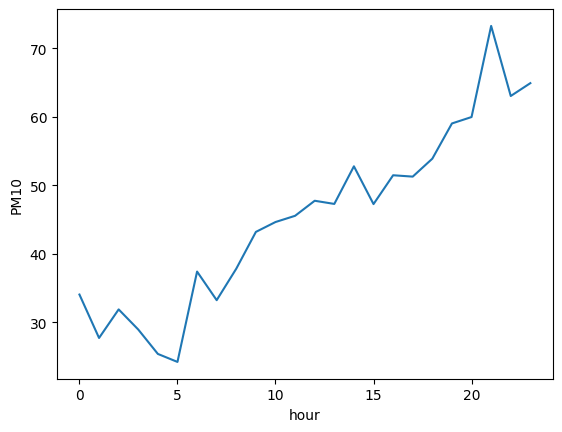

In [80]:
import matplotlib.pyplot as plt
hour = np.array(data['hour'])
pm10 = np.array(data['PM10'])
plt.plot(hour, pm10)
plt.xlabel('hour')
plt.ylabel('PM10')

Text(0, 0.5, 'PM2.5')

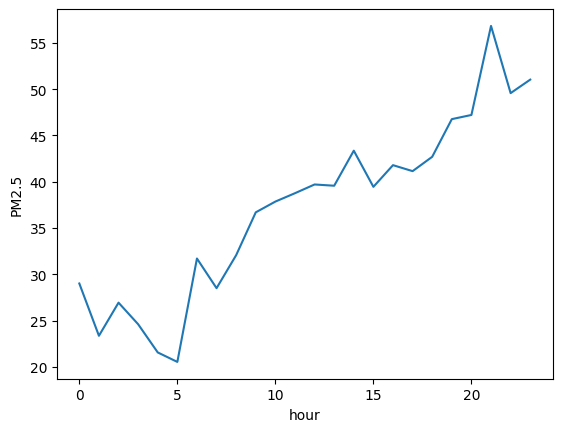

In [81]:

hour = np.array(data['hour'])
PM2p5 = np.array(data['PM2.5'])
plt.plot(hour, PM2p5)
plt.xlabel('hour')
plt.ylabel('PM2.5')

In [82]:
## the max values of both pollutants
PM2pt5= int((data['PM2.5'].max())*10)/10 ##PM2.5 max value
PM10= int(data['PM10'].max()) ## PM 10 max value
print(PM2pt5,PM10)

56.8 73


In [83]:
## creathing the Break Point Table
PM_2pt5_BP_low=[0.0,12.1,35.5,55.5,150.5,250.5,350.5]
PM_2pt5_BP_high=[12.0,35.4,55.4,150.4,250.4,350,5,500.4]
PM_10_BP_low=[0,55,155,255,355,425,505]
PM_10_BP_high=[54,154,254,354,424,504,604]
AQI_low=[0,51,101,151,201,301,401]
AQI_high=[50,100,150,200,300,400,500]
if PM2pt5 >=0 and PM2pt5<=12:
  index_Pm2pt5=0
elif PM2pt5 >=12.1 and PM2pt5<=35.4:
  index_Pm2pt5=1
elif PM2pt5 >=35.5 and PM2pt5<=55.4:
  index_Pm2pt5=2
elif PM2pt5 >= 55.5 and PM2pt5<=150.4:
  index_PM2pt5=3
elif PM2pt5 >=150.5 and  PM2pt5<=250.4:
  index_PM2pt5=4
elif PM2pt5 >=250.5 and  PM2pt5<=350.4:
  index_PM2pt5=5
elif PM2pt5 >=350.5 and  PM2pt5<=500.4:
  index_PM2pt5=6

if PM10 >=0 and PM10<=54:
  index_PM10=0
elif PM10 >=55 and PM10<=154:
  index_PM10=1
elif PM10 >=155 and PM10<=254:
  index_PM10=2
elif PM10 >= 255 and PM10<=354:
  index_PM10=3
elif PM10 >=355 and  PM10<=424:
  index_PM10=4
elif PM10 >=425 and  PM10<=504:
  index_PM10=5
elif PM10 >=505 and  PM10<=604:
  index_PM10=6

index_Pm2pt5=int(index_Pm2pt5)
index_PM10= int(index_PM10)

In [84]:
##Using the equation to calculate the AQI
type(index_Pm2pt5)
PmM2pt5_Index= (AQI_high[index_Pm2pt5]-AQI_low[index_Pm2pt5])/(PM_2pt5_BP_high[index_Pm2pt5]-PM_2pt5_BP_low[index_Pm2pt5])*(PM2pt5-PM_2pt5_BP_low[index_Pm2pt5])+AQI_low[index_Pm2pt5]
print("The index of PM2.5 is" ,int(PmM2pt5_Index))

PM10_Index=(AQI_high[index_PM10]-AQI_low[index_PM10])/(PM_10_BP_high[index_PM10]-PM_10_BP_low[index_PM10])*(PM10-PM_10_BP_low[index_PM10])+AQI_low[index_PM10]
print("The index of PM10 is" ,int(PM10_Index))




The index of PM2.5 is 153
The index of PM10 is 59
